In [1]:
import numpy as np
import matplotlib.pyplot as plt

2.2

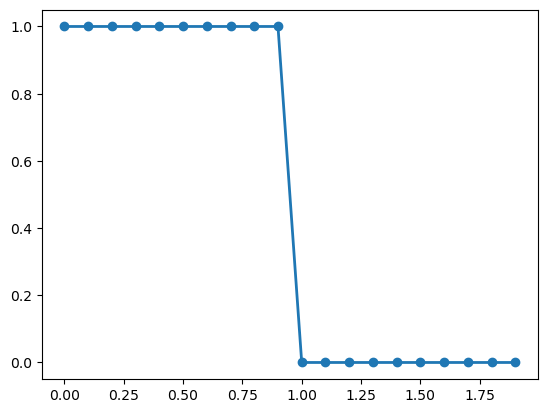

In [7]:
c = 1
dt = 0.05
dx = 0.1 

n_max = 20
x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2)

中心差分

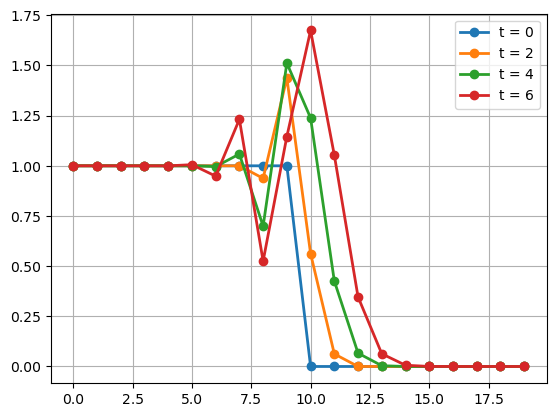

In [19]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - c * dt * (qold[j+1] - qold[j-1]) / (2.0 * dx)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

風上差分

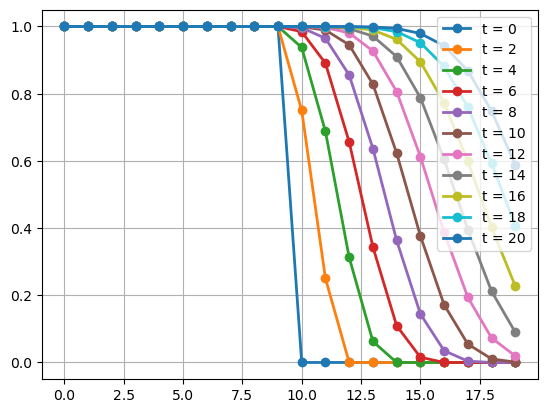

In [44]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 20

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max):
        q[j] = qold[j] - c * dt * (qold[j] - qold[j-1]) / dx
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

後退差分

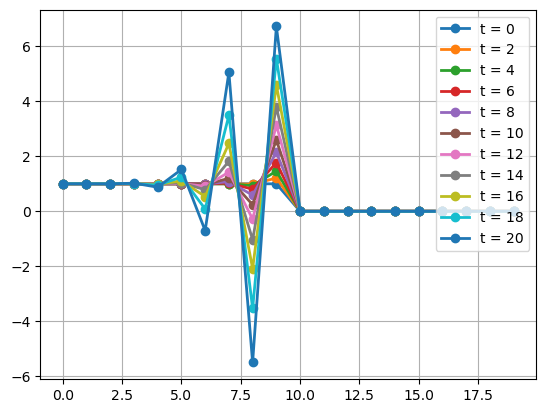

In [55]:
c = 1
dt = 0.1
dx = 1

n_max = 20
t_max = 20

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - c * dt * (qold[j+1] - qold[j]) / dx
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

Lax

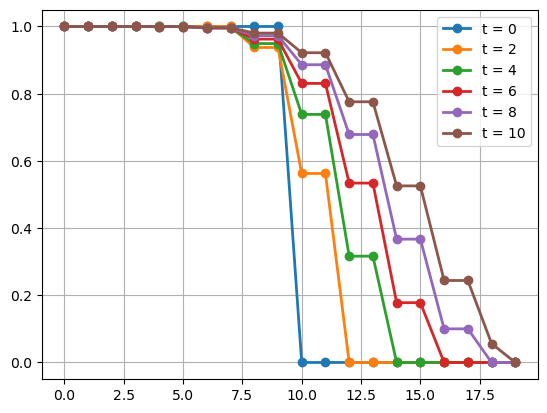

In [54]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 10

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = (qold[j+1] + qold[j-1]) / 2.0 - c/2 * dt/dx * (qold[j+1] - qold[j-1])
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

Lax-Wendroff

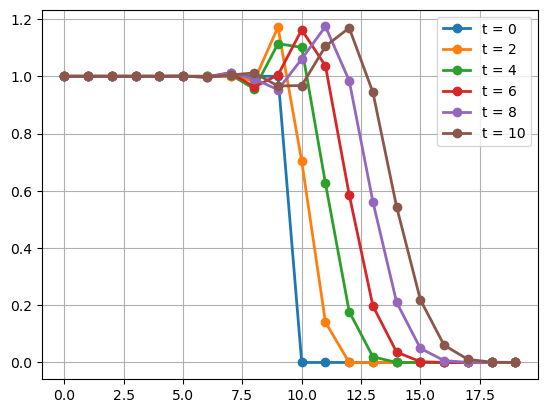

In [3]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 10

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - c/2 * dt/dx * (qold[j+1] - qold[j-1]) + c**2 / 2 * (dt/dx)**2 * (qold[j+1] - 2*qold[j] + qold[j-1])
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

### 2.3

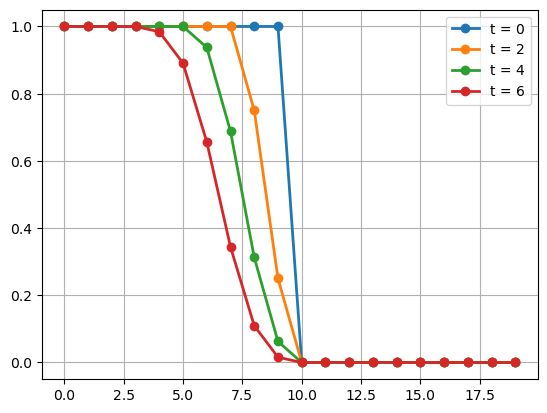

In [72]:
c = -1
dt = 0.5
dx = 1

n_max = 20
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - dt * ((c + abs(c))/2 * (qold[j] - qold[j-1])/dx + (c - abs(c))/2 * (qold[j+1] - qold[j])/dx)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

2.4

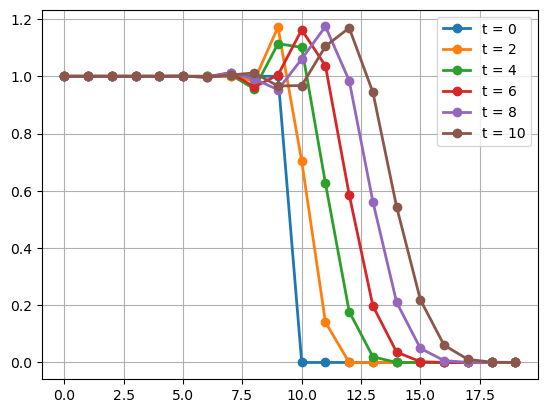

In [6]:
c = 1
dt = 0.5
dx = 1
nu = c * dt / dx 

n_max = 20
t_max = 10

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        f_right = 1/2 * (c * (1 - nu) * qold[j+1] + c * (1 + nu) * qold[j])
        f_left = 1/2 * (c * (1 - nu) * qold[j] + c * (1 + nu) * qold[j-1])
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

2.5

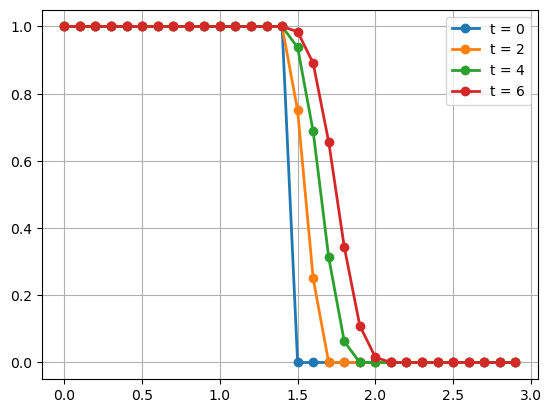

In [29]:
c = 1
dt = 0.05
dx = 0.1
nu = c * dt / dx 

n_max = 30
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(2, n_max-2):
        u_right = qold[j+1]
        u_left = qold[j]
        f_right = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        u_right = qold[j]
        u_left = qold[j-1]
        f_left = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

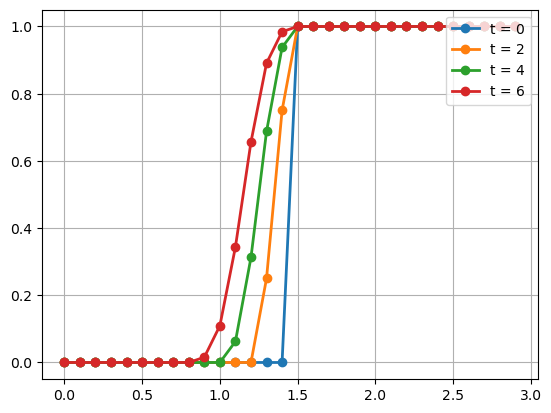

In [27]:
c = -1
dt = 0.05
dx = 0.1
nu = c * dt / dx 

n_max = 30
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[int(n_max/2):] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(2, n_max-2):
        u_right = qold[j+1]
        u_left = qold[j]
        f_right = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        u_right = qold[j]
        u_left = qold[j-1]
        f_left = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

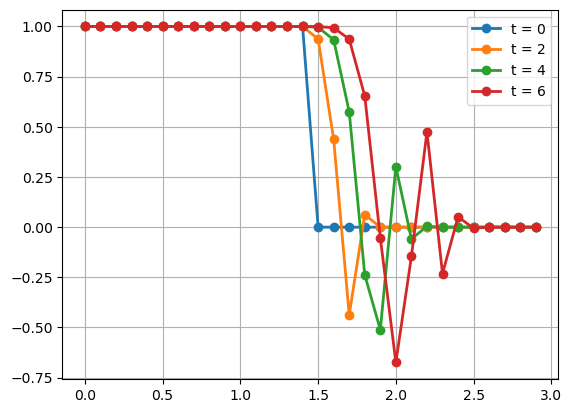

In [30]:
c = 1
dt = 0.05
dx = 0.1
nu = c * dt / dx 

n_max = 30
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(2, n_max-2):
        u_right = 3/2 * qold[j+1] - 1/2 * qold[j+2]
        u_left = 3/2 * qold[j] - 1/2 * qold[j-1]
        f_right = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        u_right = 3/2 * qold[j] - 1/2 * qold[j+1]
        u_left = 3/2 * qold[j-1] - 1/2 * qold[j-2]
        f_left = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

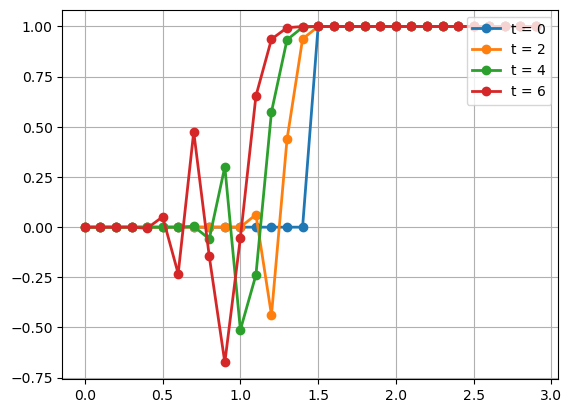

In [24]:
c = -1
dt = 0.05
dx = 0.1
nu = c * dt / dx 

n_max = 30
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[int(n_max/2):] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(2, n_max-2):
        u_right = 3/2 * qold[j+1] - 1/2 * qold[j+2]
        u_left = 3/2 * qold[j] - 1/2 * qold[j-1]
        f_right = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        u_right = 3/2 * qold[j] - 1/2 * qold[j+1]
        u_left = 3/2 * qold[j-1] - 1/2 * qold[j-2]
        f_left = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

2.6 Burgers eq.

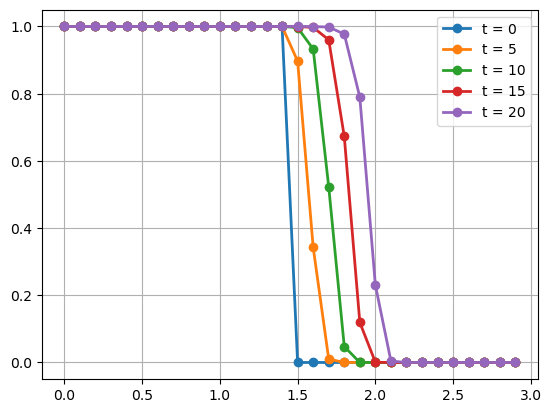

In [39]:
c = 1
dt = 0.05
dx = 0.1
nu = c * dt / dx 

n_max = 30
t_max = 20

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[:int(n_max/2)] = 1.0
q[int(n_max/2):] = 0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(2, n_max-2):
        u_right = 1/2 * qold[j+1]**2
        u_left = 1/2 * qold[j]**2
        f_right = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        u_right = 1/2 * qold[j]**2
        u_left = 1/2 * qold[j-1]**2
        f_left = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 5 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

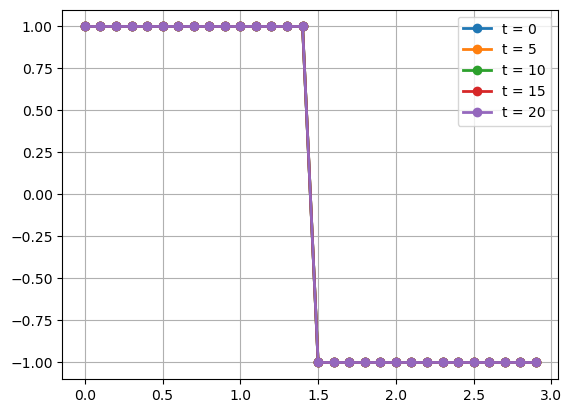

In [40]:
c = 1
dt = 0.05
dx = 0.1
nu = c * dt / dx 

n_max = 30
t_max = 20

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[:int(n_max/2)] = 1.0
q[int(n_max/2):] = -1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(2, n_max-2):
        u_right = 1/2 * qold[j+1]**2
        u_left = 1/2 * qold[j]**2
        f_right = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        u_right = 1/2 * qold[j]**2
        u_left = 1/2 * qold[j-1]**2
        f_left = 1/2 * (c * (u_right + u_left) - abs(c) * (u_right - u_left))
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 5 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

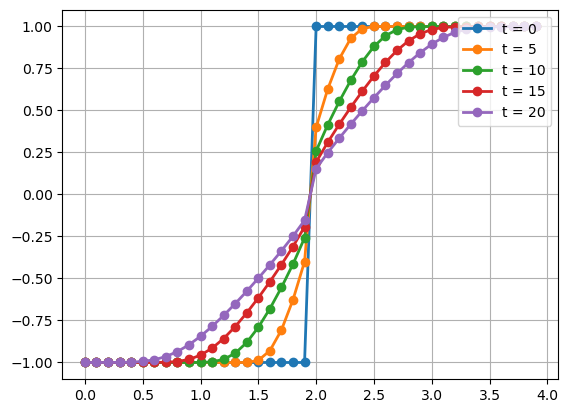

In [45]:
c = 1
dt = 0.05
dx = 0.1
nu = c * dt / dx 

n_max = 40
t_max = 20

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[:int(n_max/2)] = -1.0
q[int(n_max/2):] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        f_right = max(1/2 * ((qold[j] + abs(qold[j]))/2)**2, 1/2 * ((qold[j+1] - abs(qold[j+1]))/2)**2)
        f_left = max(1/2 * ((qold[j-1] + abs(qold[j-1]))/2)**2, 1/2 * ((qold[j] - abs(qold[j]))/2)**2)
        q[j] = qold[j] - dt/dx * (f_right - f_left)
    
    if (t % 5 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

2.7

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


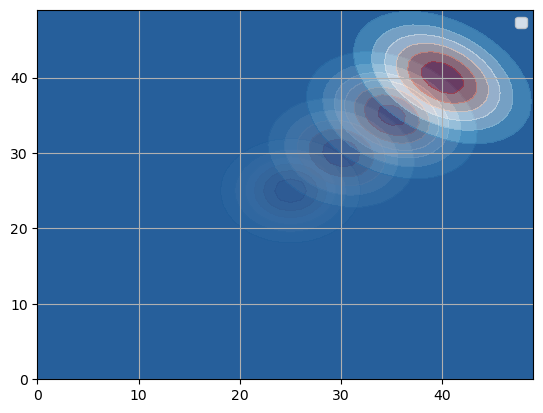

In [74]:
c = 1
d = 1
dt = 0.5
dx = 1
dy = 1

n_max = 50
sigma = 5
t_max = 30

x = np.linspace(0, (n_max-1)*dx, n_max)
y = np.linspace(0, (n_max-1)*dy, n_max)
X, Y = np.meshgrid(x, y)
q = np.exp(-((X-n_max*dx/2)**2 + (Y-n_max*dy/2)**2) / sigma**2)

plt.contourf(X, Y, q, alpha=0.5, cmap="RdBu_r")

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max):
        for k in range(1, n_max):
            q[j][k] = qold[j][k] - dt/dx * (c * (qold[j][k] - qold[j-1][k]) + d * (qold[j][k] - qold[j][k-1]))
    
    if (t % 10 == 0):
        plt.contourf(X, Y, q, alpha=0.5, cmap="RdBu_r")

plt.grid()
plt.legend(loc='upper right')
plt.show()

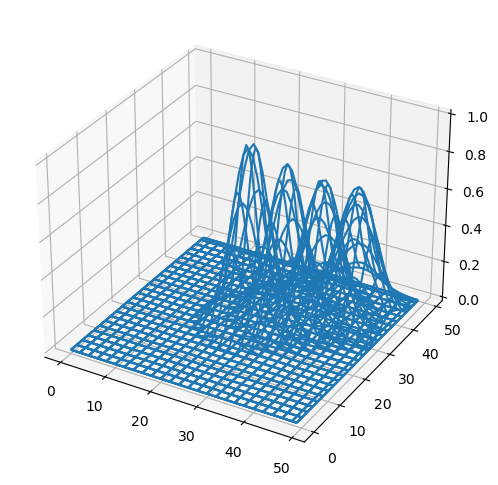

In [80]:
c = 1
d = 1
dt = 0.5
dx = 1
dy = 1

n_max = 50
sigma = 5
t_max = 30

x = np.linspace(0, (n_max-1)*dx, n_max)
y = np.linspace(0, (n_max-1)*dy, n_max)
X, Y = np.meshgrid(x, y)
q = np.exp(-((X-n_max*dx/2)**2 + (Y-n_max*dy/2)**2) / sigma**2)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, q, rstride=2, cstride=2)

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max):
        for k in range(1, n_max):
            q[j][k] = qold[j][k] - dt/dx * (c * (qold[j][k] - qold[j-1][k]) + d * (qold[j][k] - qold[j][k-1]))
    
    if (t % 10 == 0):
        ax.plot_wireframe(X, Y, q, rstride=2, cstride=2)

ax.grid()
plt.show()